In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/Users/keitatanaka/Dropbox/share/work/microcalorimeters/g4work/RS_simulation_from_Sato_san/RS_simulation_perseus/perseus_vt150_r500_test/RS-build")

def read_qdp(filename):
    print(f"Reading {filename}")
    x, y, yerr = [], [], []
    with open(filename) as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("!") or line.upper().startswith("READ") or line.upper().startswith("LAB") or line == "NO":
                continue
            parts = line.split()
            if len(parts) >= 3:
                x.append(float(parts[0]))
                y.append(float(parts[2]))
                yerr.append(float(parts[1]))
            elif len(parts) == 2:
                x.append(float(parts[0]))
                y.append(float(parts[1]))
    return np.array(x), np.array(y), np.array(yerr) if yerr else None

def sum_qdp(filelist):
    x, y, yerr = None, None, None
    for filename in filelist:
        x_temp, y_temp, yerr_temp = read_qdp(filename)
        if x is None:
            x, y, yerr = x_temp, y_temp, yerr_temp
        else:
            if not np.array_equal(x, x_temp):
                raise ValueError("X values do not match across files.")
            y += y_temp
            if yerr is not None and yerr_temp is not None:
                yerr += yerr_temp
    return x, y, yerr


Reading output_wRS_0_05_arcmin.qdp
Reading output_wRS_05_10_arcmin.qdp
Reading output_wRS_10_15_arcmin.qdp
Reading output_woRS_0_05_arcmin.qdp
Reading output_woRS_05_10_arcmin.qdp
Reading output_woRS_10_15_arcmin.qdp


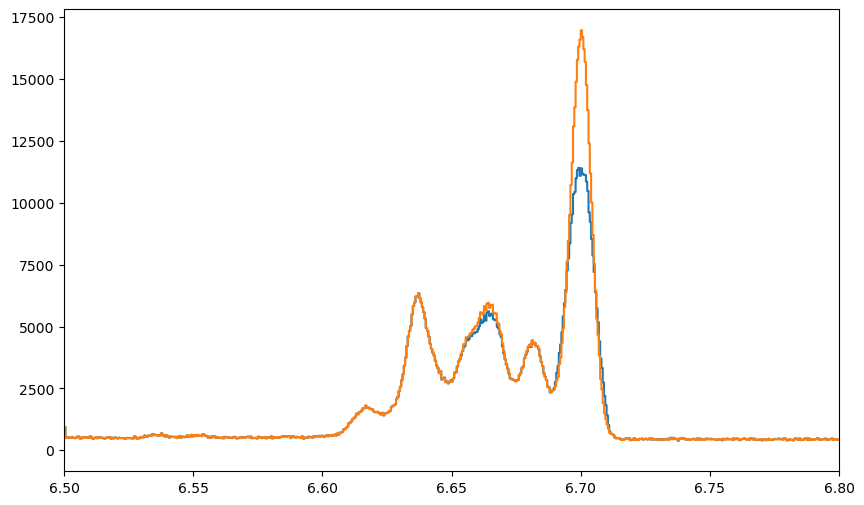

y1_flux: 201826.0
y2_flux: 267197.0
y2/y1: 0.7553453070206626


/var/folders/hy/hr899s4j6h56lyk5t8z2m3n40000gn/T/ipykernel_63026/1624475011.py:20: RuntimeWarning: invalid value encountered in divide
  plt.plot(x1, y2/y1, label='Data with error bars')


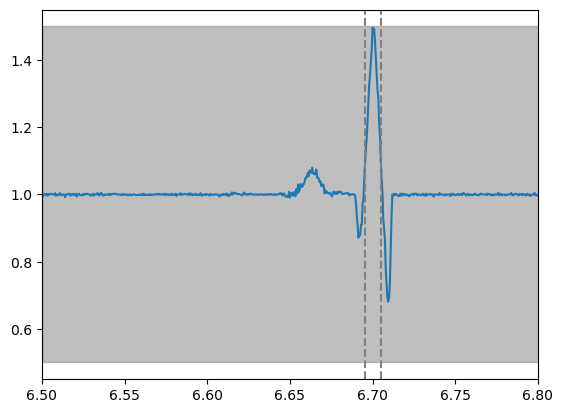

In [ ]:


RS_list = [
    "output_wRS_0_05_arcmin.qdp",
    "output_wRS_05_10_arcmin.qdp",
    "output_wRS_10_15_arcmin.qdp",
]
woRS_list = [
    "output_woRS_0_05_arcmin.qdp",
    "output_woRS_05_10_arcmin.qdp",
    "output_woRS_10_15_arcmin.qdp",
]

x1, y1, yerr1 = sum_qdp(RS_list)
x2, y2, yerr2 = sum_qdp(woRS_list)
plt.figure(figsize=(10, 6))
plt.step(x1, y1, label='Data with RS')
plt.step(x2, y2, label='Data without RS')
plt.xlim(6.5,6.8)
plt.show()

plt.plot(x1, y2/y1, label='Data with error bars')
plt.xlim(6.5,6.8)
dE = 5.e-3
flux_range = [6700.4e-3-dE, 6700.4e-3+dE]
plt.fill_between(x1, 0.5, 1.5, color='gray', alpha=0.5)
plt.axvline(x=flux_range[0], color='gray', linestyle='--')
plt.axvline(x=flux_range[1], color='gray', linestyle='--')
xmask = (x1 > flux_range[0]) & (x1 < flux_range[1])
y1_masked = y1[xmask]
y2_masked = y2[xmask]
y1_flux = np.sum(y1_masked)
y2_flux = np.sum(y2_masked)
print(f"y1_flux: {y1_flux}")
print(f"y2_flux: {y2_flux}")
print(f"y2/y1: {y1_flux/y2_flux}")
